# Figure 5



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from tqdm.auto import tqdm


import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append('../el_farol')

from main import main
from data_utils import IQR, Commonality
from config import PATHS

In [18]:
ks = [1,3,12]
df = main(
    ks=ks,
    ds=[24],
    num_rounds=100,
    num_experiments=50,
    seed=42
)

Running memory sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running predictor sweeps:   0%|          | 0/3 [00:00<?, ?it/s]

Running agent sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running round sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running experiments:   0%|          | 0/50 [00:00<?, ?it/s]

Running agent sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running round sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running experiments:   0%|          | 0/50 [00:00<?, ?it/s]

Running agent sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running round sweeps:   0%|          | 0/1 [00:00<?, ?it/s]

Running experiments:   0%|          | 0/50 [00:00<?, ?it/s]

In [19]:
df2B = df.groupby(['Identifier', 'Round', 'Num_predictors', 'Memory']).agg(
    IQR=pd.NamedAgg(column="Prediction", aggfunc=lambda x: IQR(x.values)),
    Commonality=pd.NamedAgg(column="Decision", aggfunc=lambda x: Commonality(x.values)),
).reset_index()
df2B.head(2)

,Identifier,Round,Num_predictors,Memory,IQR,Commonality
0,0,0,1,24,4.0,0.04
1,0,1,1,24,74.0,1.00


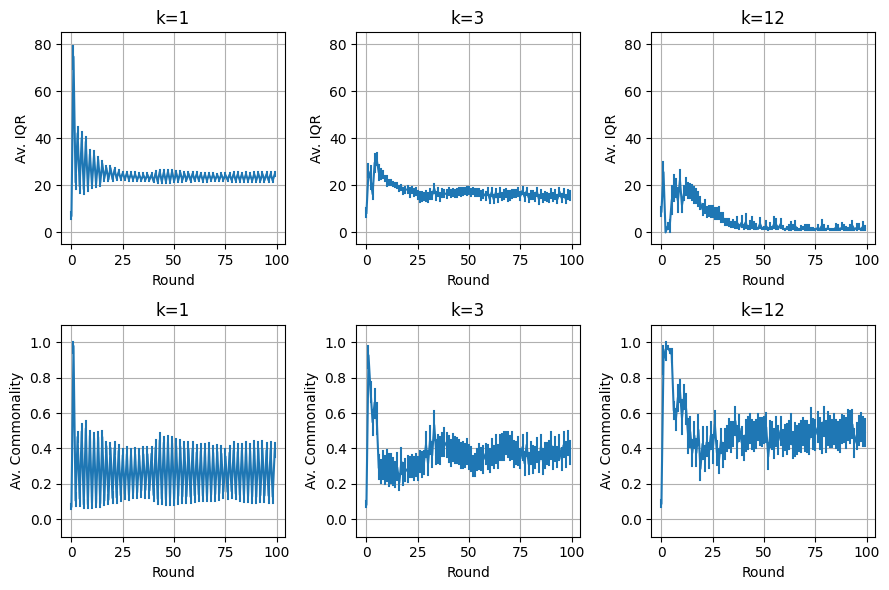

In [31]:
fig, ax = plt.subplots(
    2,3, 
    figsize=(9, 6), 
    tight_layout=True,
)

for i, k in enumerate(ks):
    df2C = df2B[df2B['Num_predictors'] == k].reset_index()
    sns.lineplot(
        x='Round', y='IQR',
        data=df2C,
        ax=ax[0,i],
        err_style="bars",ci=95
    )
    ax[0,i].set_ylabel('Av. IQR')
    ax[0,i].set_xlabel('Round')
    ax[0,i].set_title(f"k={k}")
    ax[0,i].grid()
    ax[0,i].set_ylim(-5, 85)

    sns.lineplot(
        x='Round', y='Commonality',
        data=df2C,
        ax=ax[1,i],
        err_style="bars",ci=95
    )
    ax[1,i].set_ylabel('Av. Commonality')
    ax[1,i].set_xlabel('Round')
    ax[1,i].set_title(f"k={k}")
    ax[1,i].grid()
    ax[1,i].set_ylim(-0.1, 1.1)


In [32]:
file_name = PATHS['folder_figures_for_paper'] / 'Figure5.png'
fig.savefig(file_name, dpi=300, bbox_inches='tight')

---